In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
ratingDF = pd.read_csv('D:/TLCN/final/anime-recommended-system/data/rating.csv', error_bad_lines=False)
# animeDF  = pd.read_csv('D:/TLCN/final/anime-recommended-system/data/anime.csv')

C:\Users\vohoa\AppData\Local\Temp\ipykernel_407172\792650423.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratingDF = pd.read_csv('D:/TLCN/final/anime-recommended-system/data/rating.csv', error_bad_lines=False)


In [34]:
animeDF  = pd.read_csv('D:/TLCN/final/anime-recommended-system/data/anime.csv', error_bad_lines=False)

C:\Users\vohoa\AppData\Local\Temp\ipykernel_407172\642844308.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  animeDF  = pd.read_csv('D:/TLCN/final/anime-recommended-system/data/anime.csv', error_bad_lines=False)
Skipping line 6399: expected 7 fields, saw 8
Skipping line 7060: expected 7 fields, saw 8
Skipping line 9091: expected 7 fields, saw 8



## Computational efficiency strategy
- Ngày nay nhiều người không muốn đưa ra xếp hạng vì bất kỳ lý do gì, có thể vì họ lười biếng (like me)
- Mặc dù chúng ta có thể bao gồm tất cả xếp hạng (với xếp hạng NULL), nhưng chúng ta ở đây chỉ sử dụng những xếp hạng từ 6 đén 10 để tính toán hiệu quả 
    + -1 có nghĩa là người dùng đã xem nó nhưng không chỉ định xếp hạng, vì vậy chúng tôi quyết định xóa phần này, bao gồm 1,2,3,4,5

In [37]:
### step 1 - filter only rating from 6 to 10
mask = (ratingDF['rating'] == -1) | (ratingDF['rating'] == 1) | (ratingDF['rating'] == 2) | (ratingDF['rating'] == 3) | (ratingDF['rating'] == 4) | (ratingDF['rating'] == 5)

ratingDF = ratingDF.loc[~mask]

In [38]:
### step 2 - changed rating value from 6 - 10, to 1 - 5

def change_rating(rating):
    if rating == 6:
        return 1
    elif rating == 7:
        return 2
    elif rating == 8:
        return 3
    elif rating == 9:
        return 4
    elif rating == 10:
        return 5
    
ratingDF['rating'] = ratingDF['rating'].apply(change_rating)

In [39]:
ratingDF

,user_id,anime_id,rating
47,1,8074,5
81,1,11617,5
83,1,11757,5
101,1,15451,5
153,2,11771,5
...,...,...,...
7813732,73515,16512,2
7813733,73515,17187,4
7813734,73515,22145,5
7813735,73516,790,4


In [41]:
# ratingDF.to_csv('rating_change.csv', index=False)

KeyboardInterrupt: 

In [14]:
animeDF

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama|Romance|School|Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action|Adventure|Drama|Fantasy|Magic|Military|...,TV,64,9.26,793665
2,28977,Gintama°,Action|Comedy|Historical|Parody|Samurai|Sci-Fi...,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi|Thriller,TV,24,9.17,673572
4,9969,Gintama&#039;,Action|Comedy|Historical|Parody|Samurai|Sci-Fi...,TV,51,9.16,151266
...,...,...,...,...,...,...,...
12286,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12287,5543,Under World,Hentai,OVA,1,4.28,183
12288,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12289,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [21]:
animeDF.isna().sum()  # checking missing values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [24]:
animeDF.dropna(inplace=True)

In [25]:
animeDF.isna().sum() 

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [23]:
ratingDF.shape

(7813737, 3)

In [6]:
ratingDF.isnull().sum() # check if any null values in data

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
ratingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [42]:
ratingDF.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


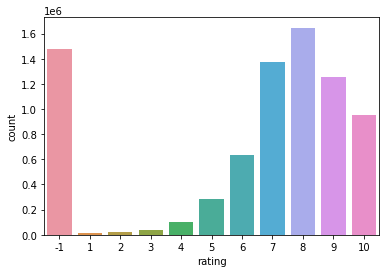

In [9]:
import seaborn as sns
sns.countplot(x='rating',data=ratingDF) #count number of every rating graphically

In [10]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(ratingDF.groupby('user_id')['rating'].mean().sort_values(ascending=False))


In [11]:
#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(ratingDF.groupby('user_id')['rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,rating,number of rating
user_id,,
48766,-1.000000,10227
42635,6.354951,3747
53698,6.546644,2905
57620,7.921170,2702
59643,7.040638,2633
...,...,...
46825,10.000000,1
46835,10.000000,1
46847,10.000000,1


In [12]:
ratingDF.groupby('rating')['user_id'].count() #How many user give each rating

rating
-1     1476496
 1       16649
 2       23150
 3       41453
 4      104291
 5      282806
 6      637775
 7     1375287
 8     1646019
 9     1254096
 10     955715
Name: user_id, dtype: int64

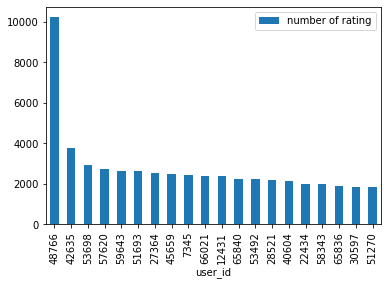

In [13]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

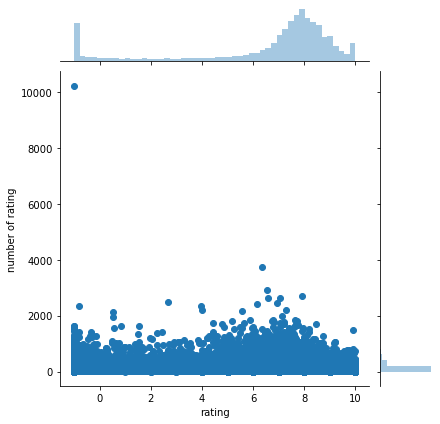

In [14]:
#This graph doesn't add much insight but we can figure out that most of the 5 rating given by very few users. 
sns.jointplot(x='rating',y='number of rating',data=rating)

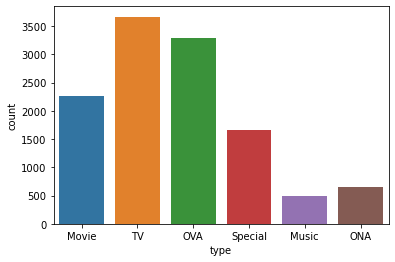

In [43]:
ax = sns.countplot(x="type",data=animeDF)

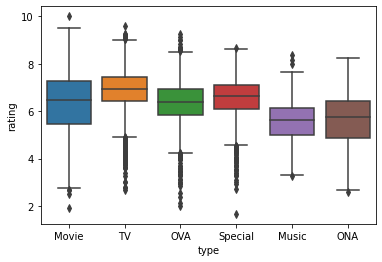

In [46]:
ax = sns.boxplot(x="type", y="rating", data=animeDF)

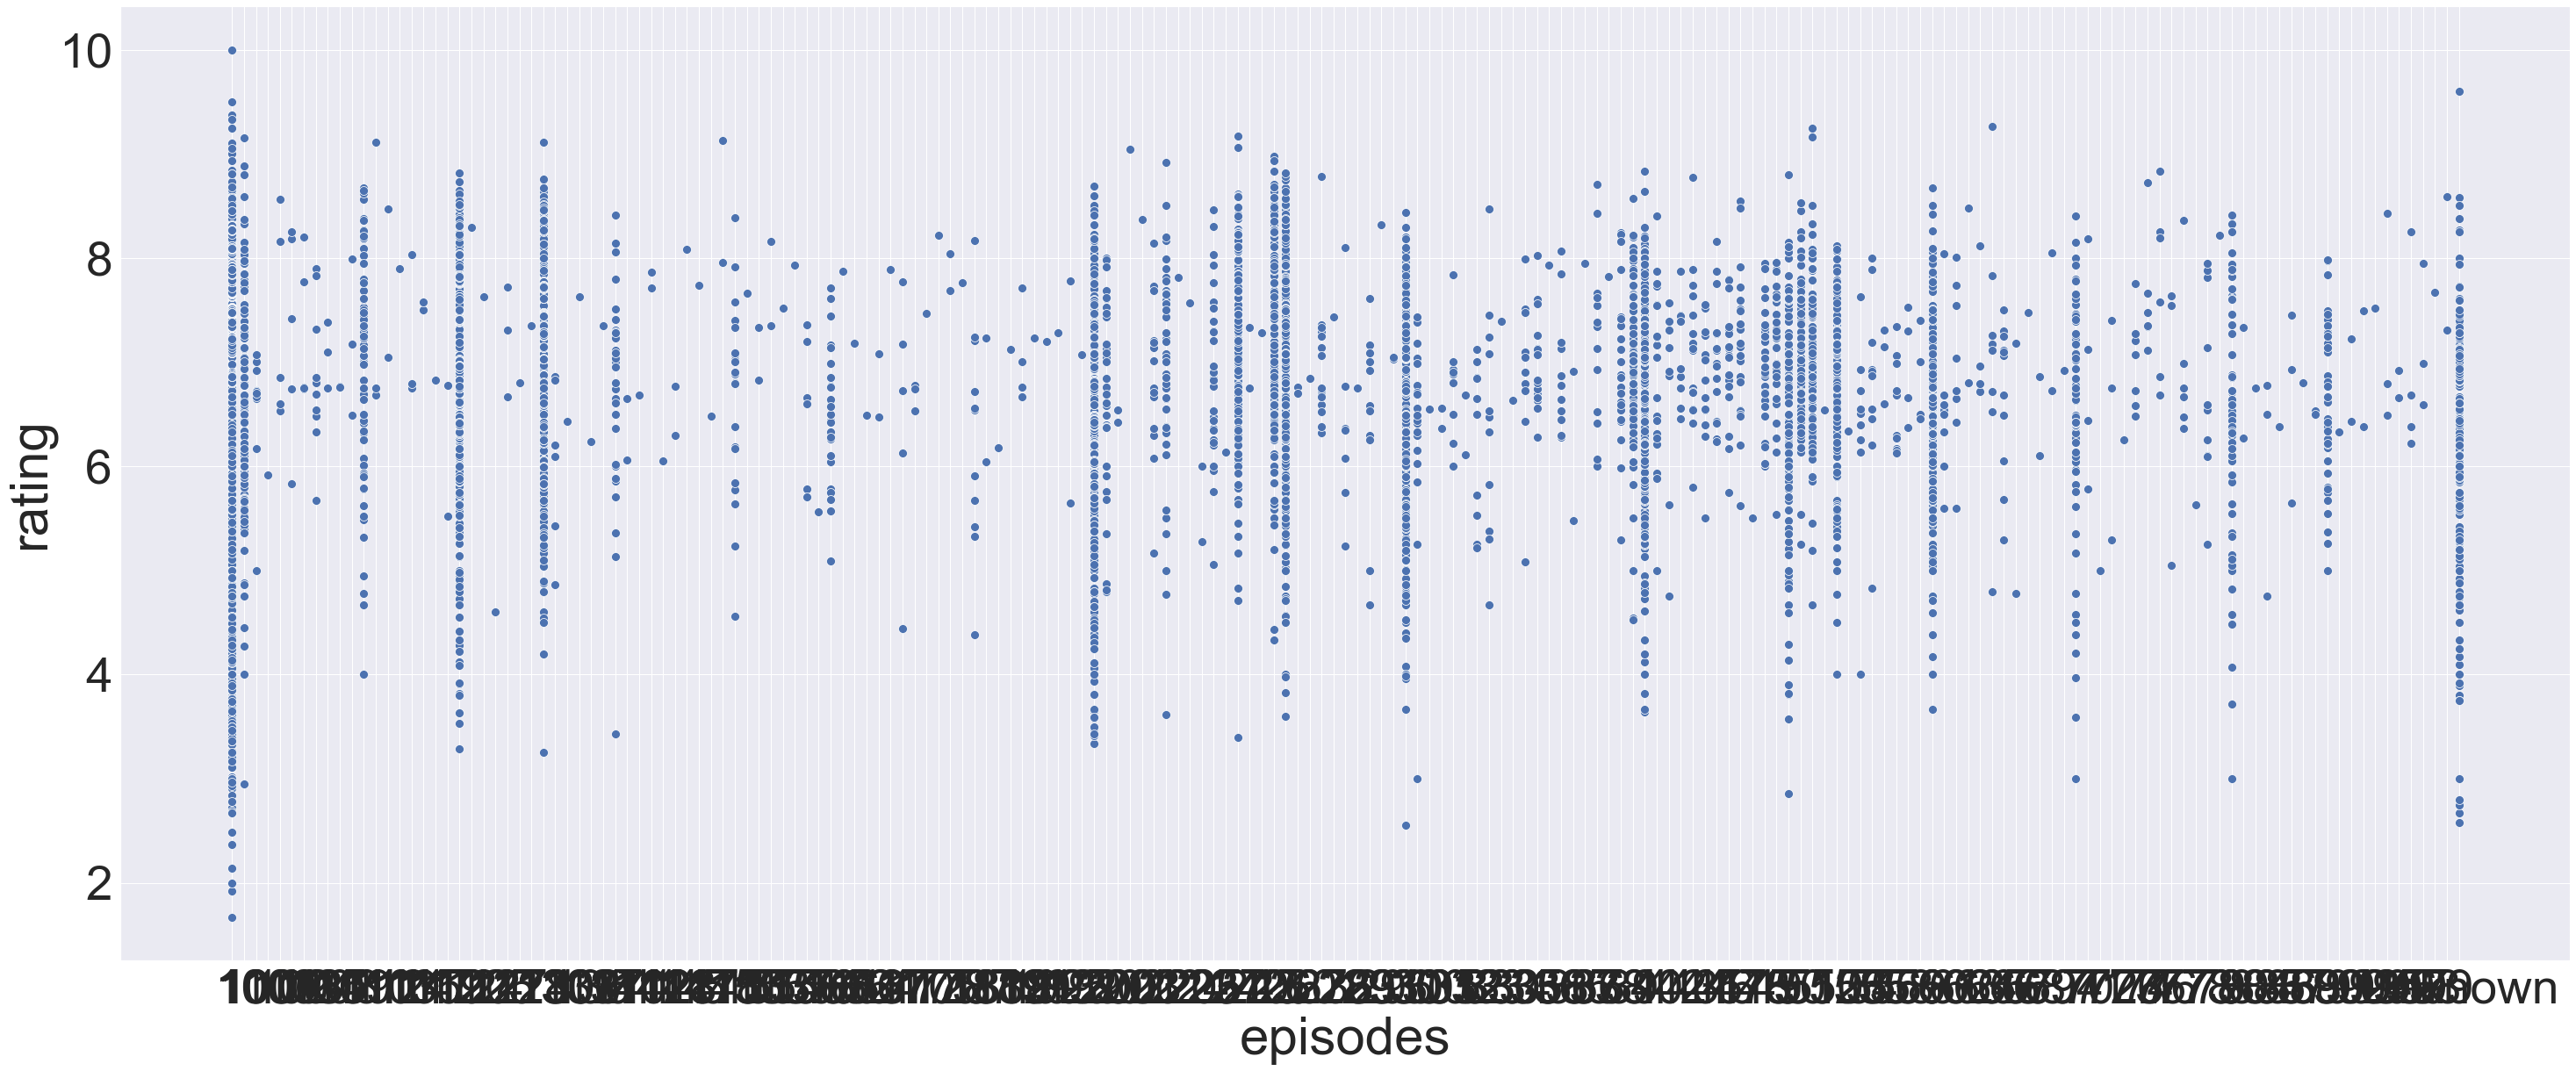

In [47]:
plt.figure(figsize=(50,20))
sns.set(font_scale=5)
sns.scatterplot(x="episodes", y="rating", data=animeDF.sort_values('episodes'), s=100)
plt.show()

In [28]:
anime_ratingDF = animeDF.merge(ratingDF, on='anime_id') # joining the two dataframes


In [29]:
anime_ratingDF

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [30]:
anime_ratingDF.isna().sum()  # checking missing values


anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [31]:
anime_ratingDF.dropna(inplace=True) # dropping off all the missing values

In [32]:
anime_ratingDF.isna().sum()  # checking missing values

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [33]:
anime_ratingDF.groupby('name').count().sort_values('user_id',ascending=False).head(10)['user_id'].describe() # checking for each anime, how many reviewers (user_id) viewed it

count       10.000000
mean     28172.800000
std       4436.430116
min      24283.000000
25%      25255.250000
50%      27344.500000
75%      29117.500000
max      39340.000000
Name: user_id, dtype: float64

In [34]:
user_rating_count_df = pd.DataFrame(anime_ratingDF.groupby('name').count()['user_id']).rename(columns={'user_id':'total_reviews'})  # making a dataframe of anime's name along with number of reviewrs

In [36]:
user_rating_count_df # checking the above created dataframe

,total_reviews
name,
&quot;0&quot;,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,782
&quot;Bungaku Shoujo&quot; Memoire,809
&quot;Bungaku Shoujo&quot; Movie,1535
...,...
xxxHOLiC Kei,3413
xxxHOLiC Movie: Manatsu no Yoru no Yume,2365
xxxHOLiC Rou,1513


In [35]:
anime_merged_df = animeDF.merge(user_rating_count_df, on='name') # merging the above created dataframe with the master dataframe

In [37]:
anime_merged_df  # checking the master dataframe

,anime_id,name,genre,type,episodes,rating,members,total_reviews
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,2199
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,24574
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1386
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,19283
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,3673
...,...,...,...,...,...,...,...,...
11157,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,4
11158,5543,Under World,Hentai,OVA,1,4.28,183,4
11159,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,3
11160,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,4


In [39]:
animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'] # checking the member base per anime

name
Death Note                          1013917
Shingeki no Kyojin                   896229
Sword Art Online                     893100
Fullmetal Alchemist: Brotherhood     793665
Angel Beats!                         717796
Code Geass: Hangyaku no Lelouch      715151
Naruto                               683297
Steins;Gate                          673572
Mirai Nikki (TV)                     657190
Toradora!                            633817
Name: members, dtype: int64

Text(0.5, 1.0, 'Member base per anime')

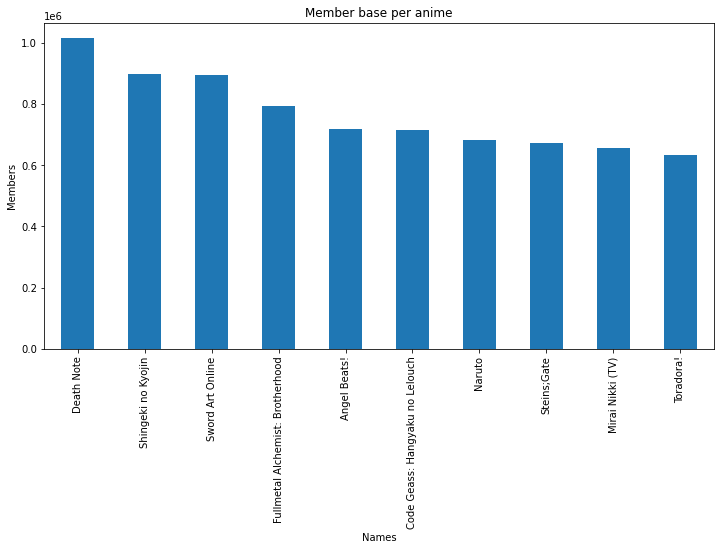

In [40]:
animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest member base
plt.xlabel('Names')
plt.ylabel('Members')
plt.title('Member base per anime')

Text(0.5, 1.0, 'Total Review Counts per Anime')

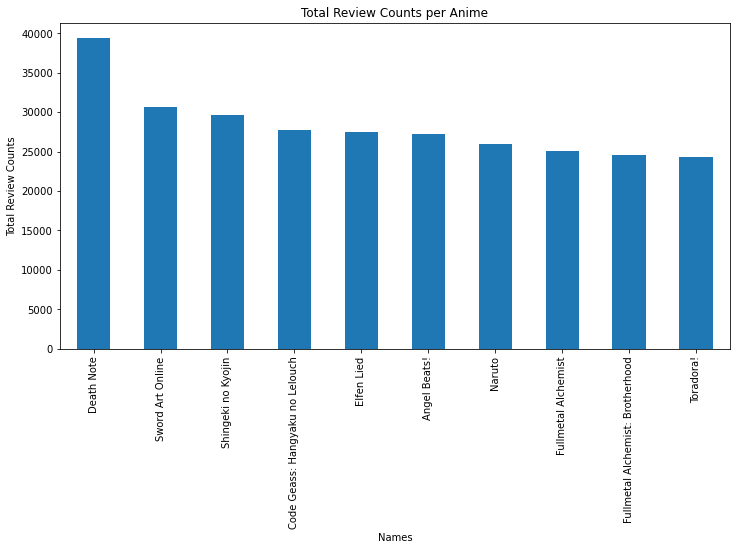

In [41]:
anime_merged_df.groupby('name').mean().sort_values('total_reviews',ascending=False).head(10)['total_reviews'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest reviews
plt.xlabel('Names')
plt.ylabel('Total Review Counts')
plt.title('Total Review Counts per Anime')